In [ ]:
import pandas as pd
def get_filename(from_symbol, to_symbol, exchange, datetime_interval, download_date):
    return '%s_%s_%s_%s_%s.csv' % (from_symbol, to_symbol, exchange, datetime_interval, download_date)
def read_dataset(filename):
    print('Reading data from %s' % filename)
    df = pd.read_csv(filename)
    df.datetime = pd.to_datetime(df.datetime)
    df = df.set_index('datetime')
    df = df.sort_index()
    print(df.shape)
    return df

In [ ]:
df_btc = read_dataset(get_filename('BTC', 'USD', 'Coinbase', 'hour', '2017-12-24'))
df_eth = read_dataset(get_filename('ETH', 'USD', 'Coinbase', 'hour', '2017-12-24'))
df_ltc = read_dataset(get_filename('LTC', 'USD', 'Coinbase', 'hour', '2017-12-24'))
df_btc.head()

Reading data from BTC_USD_Coinbase_hour_2017-12-24.csv
(2001, 6)
Reading data from ETH_USD_Coinbase_hour_2017-12-24.csv
(2001, 6)
Reading data from LTC_USD_Coinbase_hour_2017-12-24.csv
(2001, 6)


,low,high,open,close,volumefrom,volumeto
datetime,,,,,,
2017-10-02 08:00:00,4435.00,4448.98,4435.01,4448.85,85.51,379813.67
2017-10-02 09:00:00,4448.84,4470.00,4448.85,4464.49,165.17,736269.53
2017-10-02 10:00:00,4450.27,4469.00,4464.49,4461.63,194.95,870013.62
2017-10-02 11:00:00,4399.00,4461.63,4461.63,4399.51,326.71,1445572.02
2017-10-02 12:00:00,4378.22,4417.91,4399.51,4383.00,549.29,2412712.73


We are going to analyze closing prices, which are prices at which the hourly period closed. We merge BTC, ETH and LTC closing prices to a Dataframe to make analysis easier.

In [ ]:
df = pd.DataFrame({'BTC': df_btc.close,
                   'ETH': df_eth.close,
                   'LTC': df_ltc.close})
df.head()

,BTC,ETH,LTC
datetime,,,
2017-10-02 08:00:00,4448.85,301.37,54.72
2017-10-02 09:00:00,4464.49,301.84,54.79
2017-10-02 10:00:00,4461.63,301.95,54.63
2017-10-02 11:00:00,4399.51,300.02,54.01
2017-10-02 12:00:00,4383.00,297.51,53.71


In [ ]:
df.describe()

,BTC,ETH,LTC
count,2001.000000,2001.000000,2001.000000
mean,9060.256122,407.263793,106.790100
std,4404.269591,149.480416,89.142241
min,4150.020000,277.810000,48.610000
25%,5751.020000,301.510000,55.580000
50%,7319.950000,330.800000,63.550000
75%,11305.000000,464.390000,100.050000
max,19847.110000,858.900000,378.660000


In 2.7 months, all three cryptocurrencies fluctuated a lot as you can observe in the table.

For each coin, we count the number of events and calculate mean, standard deviation, minimum, quartiles, and maximum closing price.

Observations

The difference between the highest and the lowest BTC price was more than 15000/- in 2.7 months.
The LTC surged from 48.61/- to 378.66/- at a certain point, which is an increase of 678.98%.


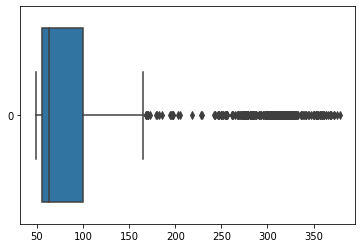

In [ ]:
import seaborn as sns
ax = sns.boxplot(data=df['LTC'], orient="h")

On the box plot above, we see that LTC closing hourly price was most of the time between 50/- and 100/- in the last 2.7 months. All values over 150/- are outliers (using IQR).

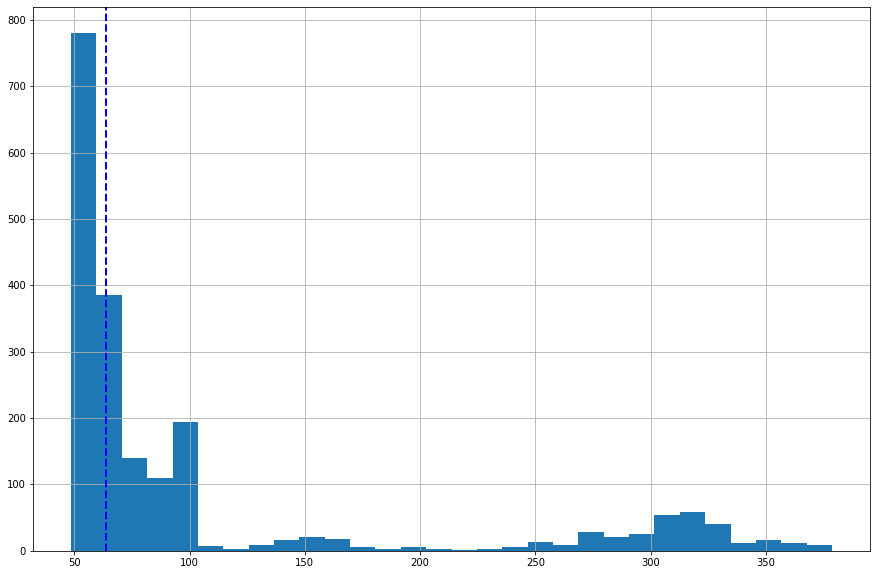

In [ ]:
df['LTC'].hist(bins=30, figsize=(15,10)).axvline(df['LTC'].median(), color='b', linestyle='dashed', linewidth=2)

Observations

LTC closing price was not over 100/- for many hours.
Tt has right-skewed distribution because a natural limit prevents outcomes on one side.
blue dashed line (median) shows that half of the time closing prices were under 63.50/-.


The chart below shows the absolute closing prices. BTC closing prices are much higher than prices of ETH and LTC.

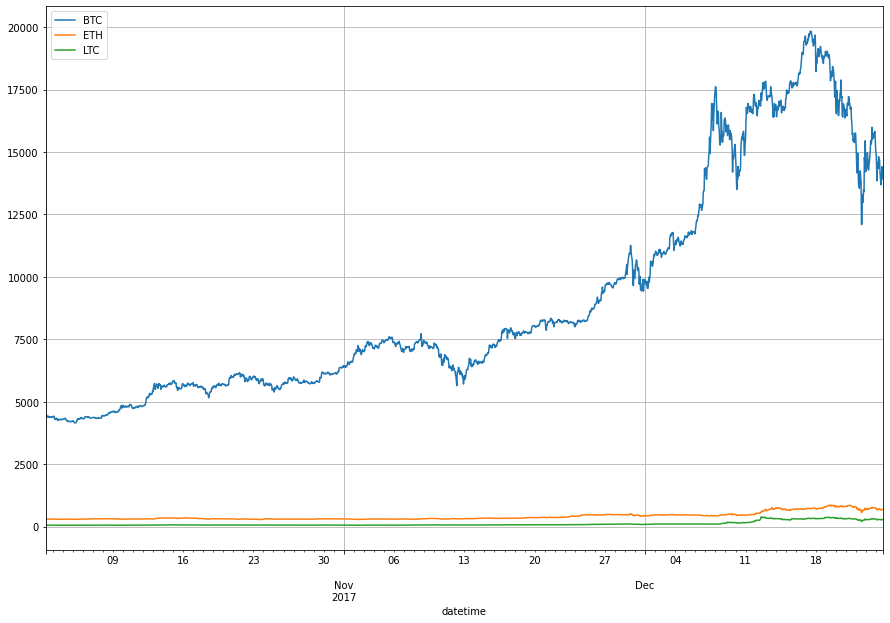

In [ ]:
df.plot(grid=True, figsize=(15, 10))

We are interested in a relative change of the price rather than in absolute price, so we use three different y-axis scales.

We can see that closing prices move together. When one coin closing price increases so do the other.

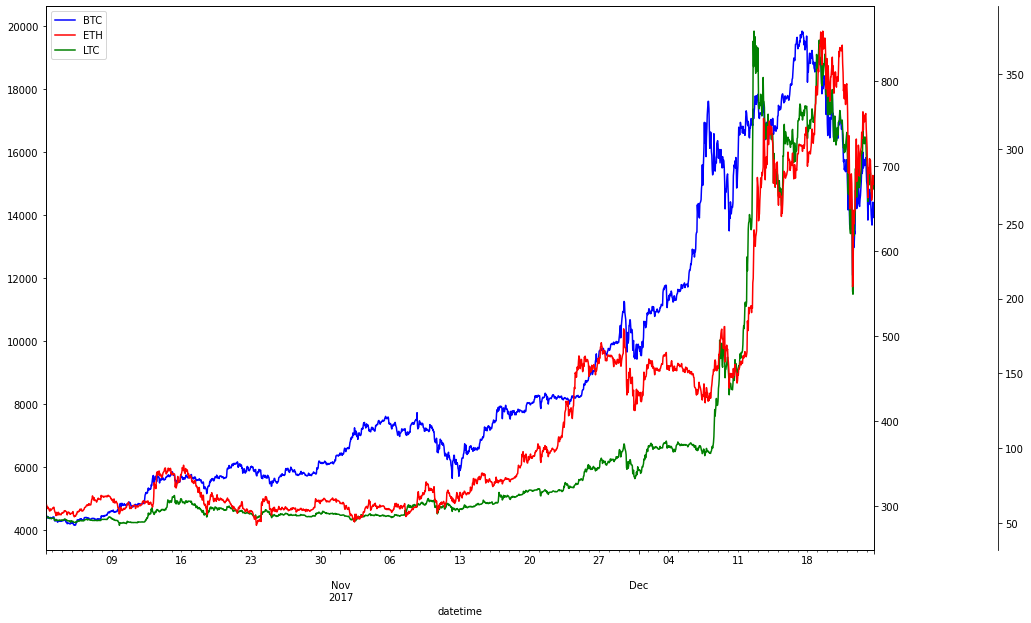

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()
rspine = ax2.spines['right']
rspine.set_position(('axes', 1.15))
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
fig.subplots_adjust(right=0.7)
df['BTC'].plot(ax=ax1, style='b-')
df['ETH'].plot(ax=ax1, style='r-', secondary_y=True)
df['LTC'].plot(ax=ax2, style='g-')

ax2.legend([ax1.get_lines()[0],
            ax1.right_ax.get_lines()[0],
            ax2.get_lines()[0]],
           ['BTC', 'ETH', 'LTC'])

Buy and hold is a passive investment strategy in which an investor buys a cryptocurrency and holds it for a long period, regardless of fluctuations in the market.

Let’s analyze returns using the Buy and hold strategy for the past 2.7 months. We calculate the return percentage, where t represents a certain period and price0 is the initial closing price:

In [ ]:
df_return = df.apply(lambda x: x / x[0])
df_return.head()

,BTC,ETH,LTC
datetime,,,
2017-10-02 08:00:00,1.000000,1.000000,1.000000
2017-10-02 09:00:00,1.003516,1.001560,1.001279
2017-10-02 10:00:00,1.002873,1.001925,0.998355
2017-10-02 11:00:00,0.988909,0.995520,0.987025
2017-10-02 12:00:00,0.985198,0.987192,0.981542


We show that LTC was the most profitable for the period between October 2, 2017 and December 24, 2017.

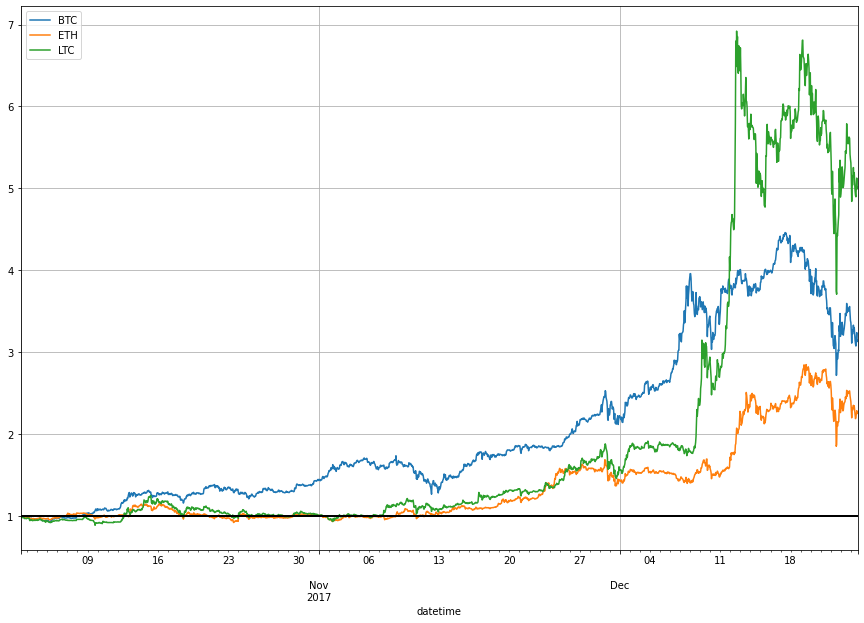

In [ ]:
df_return.plot(grid=True, figsize=(15, 10)).axhline(y = 1, color = "black", lw = 2)